# Engenharia de Machine Learning [23E1_3]

## Projeto da Disciplina
### Aluno: Pedro Pinheiro Cabral
### Professor: Felipe Fink

Link do github: https://github.com/ppcpedro/engenharia_de_machine_learning_pedro_p

1) Metodologia 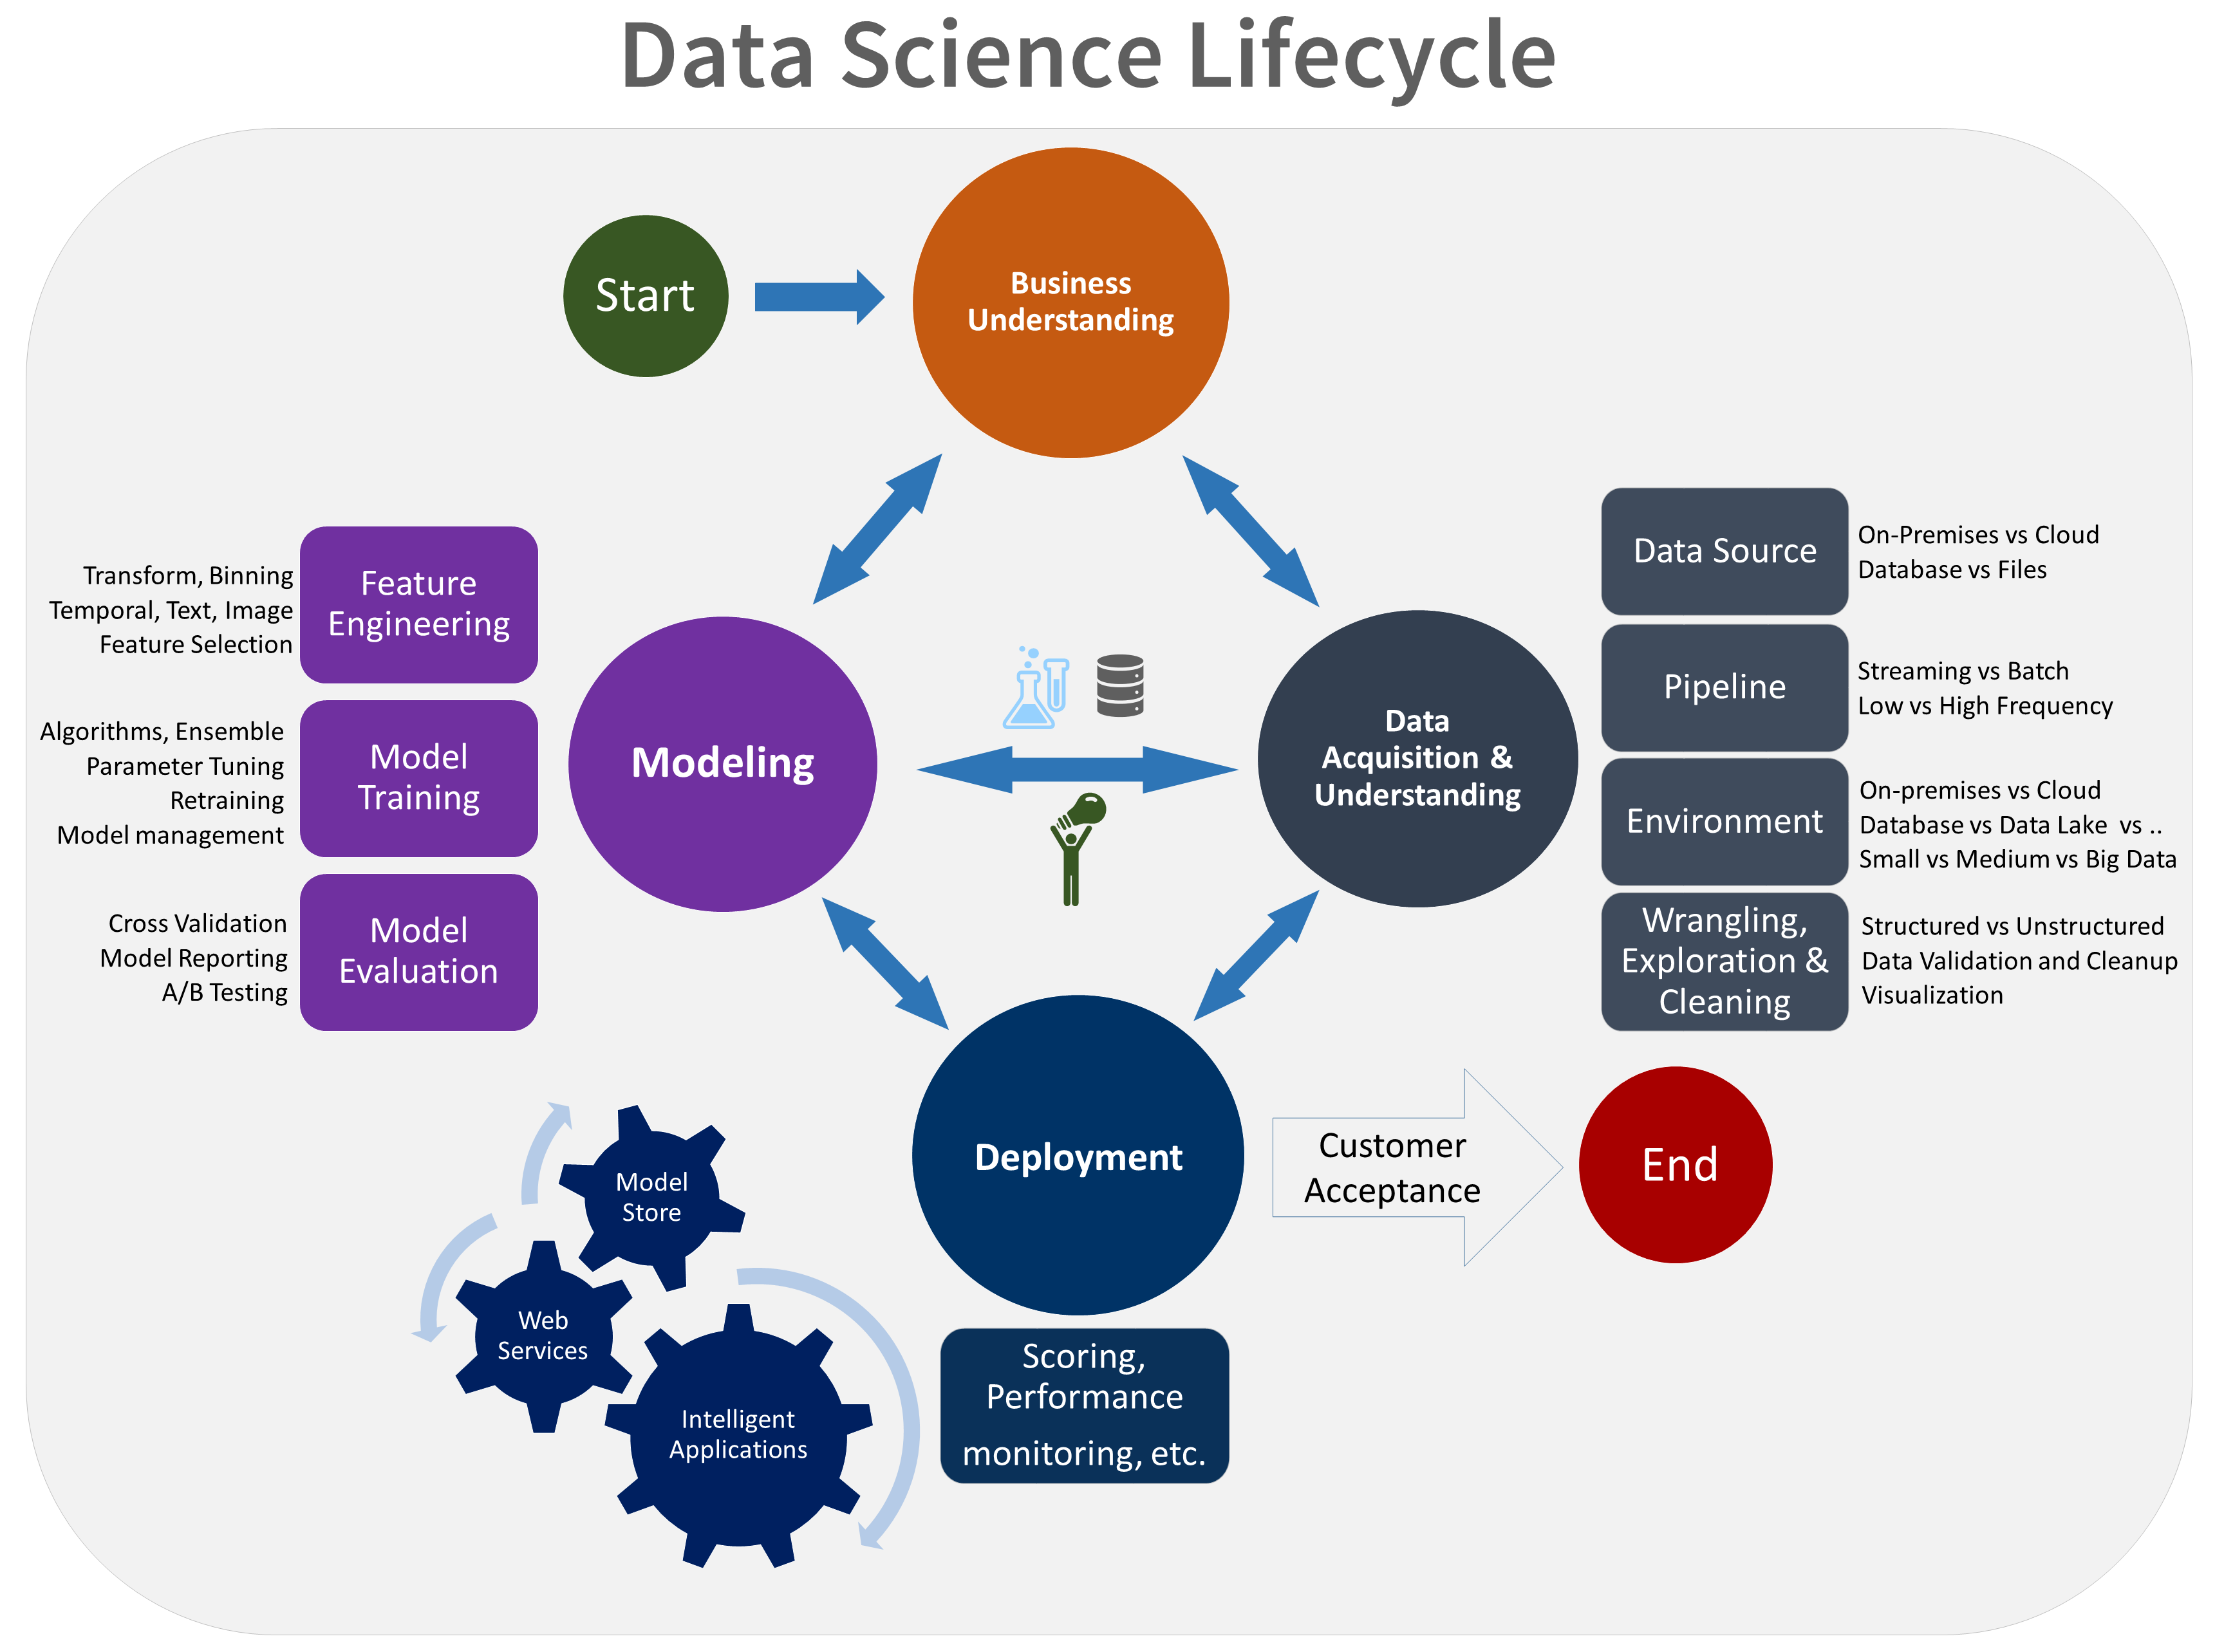

2) Diagrama

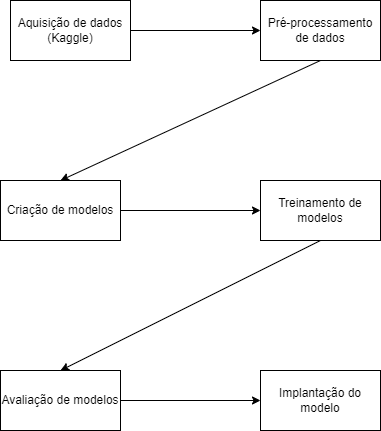

3) Os pipelines de desenvolvimento e produção são importantes em soluções de aprendizado de máquinas porque eles permitem que as equipes de desenvolvimento e operações trabalhem juntas para criar e implementar código em um ambiente de produção. Eles também padronizam a prática de MLOps e dão suporte à colaboração em equipe de maneira escalável. Os pipelines de aprendizado de máquina implementam e formalizam processos para acelerar, reutilizar, gerenciar e implantar modelos de aprendizado de máquina.

4) As ferramentas Streamlit, MLFlow, PyCaret e Scikit-Learn auxiliam na construção dos pipelines de aprendizado de máquina em vários aspectos:

a. Rastreamento de experimentos: O MLFlow é uma ferramenta que permite rastrear experimentos e gerenciar modelos de aprendizado de máquina;

b. Funções de treinamento: O PyCaret é uma ferramenta de AutoML que auxilia no treinamento de modelos utilizando vários “flavors” sendo Scikit-Learn um deles;

c. Monitoramento da saúde do modelo: É possível utilizar gráficos com as mais variadas métricas no Streamlit para monitorar a saúde do modelo;

d. Atualização de modelo: O MLFlow permite atualizar modelos de aprendizado de máquina com facilidade;

e. Provisionamento (Deployment): O Scikit-Learn exporta modelos com o formato pickle nativo do Python e o MLFlow exporta modelos para uso por ferramentas genéricas baseadas em pyfunc e inferência em lote.

5) Uma descrição dos artefatos que serão criados, dado o diagrama: De início, temos a nossa base crua. Daí, iremos pré-processar esses dados e teremos a base filtrada. Com isso, nas fases seguintes teremos as informações de performance do modelo, além do próprio modelo. Por fim, teremos uma base final com a previsão do modelo. 

In [29]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, f1_score
from pycaret.classification import *

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("PreparacaoDados")

pd.set_option('display.max_columns', None)

2023/04/15 17:51:53 INFO mlflow.tracking.fluent: Experiment with name 'PreparacaoDados' does not exist. Creating a new experiment.


In [30]:
data = pd.read_csv("./Data/kobe_dataset.csv")

In [31]:
data.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [32]:
data

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,1,1999-00,5,4,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,1,1999-00,5,0,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


In [33]:
# Filtrando os dados onde o valor de shot_type for igual à 2PT Field Goal e selecionando as colunas especificadas
data = data[data["shot_type"] == "2PT Field Goal"][["lat", "lon", "minutes_remaining", "period", "playoffs", "shot_distance", "shot_made_flag"]]

# Removendo linhas com valores faltantes
data = data.dropna()

# Salvando o dataset resultante na pasta "./Data/processed/data_filtered.parquet"
data.to_parquet("./Data/processed/data_filtered.parquet")


In [34]:
data

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
1,34.0443,-118.4268,10,1,0,15,0.0
2,33.9093,-118.3708,7,1,0,16,1.0
3,33.8693,-118.1318,6,1,0,22,0.0
4,34.0443,-118.2698,6,2,0,0,1.0
5,34.0553,-118.4148,9,3,0,14,0.0
...,...,...,...,...,...,...,...
30690,33.9443,-118.3828,11,4,1,15,0.0
30691,34.0443,-118.2698,7,4,1,0,0.0
30692,33.9963,-118.2688,6,4,1,4,0.0
30694,33.8783,-118.4038,3,4,1,21,1.0


6) A escolha do que vai para treino e teste é determinante para o sucesso do modelo. Primeiramente, é necessário encontrar um bom equilíbrio entre dados de treino e teste, em geral a regra 80/20 tende a funcionar bem, porém é preciso ter cuidado com isso. Mais criticamente, é importante que a distribuição dos dados de treino e teste seja similar, o uso de amostras estratificadas serve justamente para não ter dados desequilibrados entre treino e teste, que introduziria um viés e prejudicaria a performance.

In [50]:
try:
    mlflow.end_run()
except:
    pass

############### 6)

# c. Separando os dados em treino (80%) e teste (20 %) usando uma escolha aleatória e estratificada.
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, \
                                         stratify=data["shot_made_flag"])

# Salvando os datasets resultantes em "./Data/operation/base_{train|test}.parquet"
train_data.to_parquet("./Data/operation/base_train.parquet")
test_data.to_parquet("./Data/operation/base_test.parquet")

# Registrando os parâmetros (% teste) e métricas (tamanho de cada base) no MlFlow
mlflow.set_experiment("Kobe Bryant Shot Selection")

with mlflow.start_run(run_name="PreparacaoDados"):
  # b. Qual a dimensão resultante do dataset?
    print(f"Dimensão do dataset resultante: {data.shape}")

    # d. Registre os parâmetros (% teste) e métricas (tamanho de cada base) no MlFlow
    mlflow.log_param("test_size", 0.2)
    mlflow.log_metric("train_size", len(train_data))
    mlflow.log_metric("test_size", len(test_data))
    mlflow.log_artifact("./Data/operation/base_train.parquet")
    mlflow.log_artifact("./Data/operation/base_test.parquet")

############## 7)
with mlflow.start_run(run_name="Treinamento_Regression"):
    # 7a. Treinando um modelo com regressão logística do sklearn usando a biblioteca pyCaret.
    exp_clf101 = setup(data=train_data, target='shot_made_flag', session_id=123)
    best_model = compare_models()

    # b. Registre a função custo "log loss" usando a base de teste
    y_pred = predict_model(best_model, data=test_data)
    log_loss_score = log_loss(y_true=y_pred['shot_made_flag'], \
                              y_pred=y_pred['prediction_label'])
    mlflow.log_metric("log_loss_score", log_loss_score)

with mlflow.start_run(run_name="Treinamento_Classification") as run:
    # c. Treinando um modelo de classificação do sklearn usando a biblioteca pyCaret.
    best_model = compare_models(sort='F1')

    # d. Registre a função custo "log loss" e F1_score para esse novo modelo
    y_pred = predict_model(best_model, data=test_data)
    log_loss_score = log_loss(y_true=y_pred['shot_made_flag'],\
                              y_pred=y_pred['prediction_label'])
    f1_score_value = f1_score(y_true=y_pred['shot_made_flag'],\
                              y_pred=y_pred['prediction_label'])
    mlflow.log_metric("log_loss_score", log_loss_score)
    mlflow.log_metric("f1_score_value", f1_score_value)

    # Logar o modelo sklearn e registrar como versão 1
    mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="best-model",
        registered_model_name="best-model-registered",
    )

    # registrar run id para próxima questão
    run_id = run.info.run_id

    uri = mlflow.get_tracking_uri()

Dimensão do dataset resultante: (20285, 7)


,Description,Value
0,Session id,123
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.5919,0.6020,0.3984,0.6114,0.4823,0.1695,0.1802,0.0540
gbc,Gradient Boosting Classifier,0.5887,0.6038,0.4141,0.6002,0.4899,0.1645,0.1724,0.0540
ridge,Ridge Classifier,0.5803,0.0000,0.4974,0.5691,0.5308,0.1543,0.1555,0.0450
lda,Linear Discriminant Analysis,0.5802,0.6037,0.4982,0.5689,0.5311,0.1542,0.1553,0.0460
lr,Logistic Regression,0.5798,0.6017,0.4934,0.5691,0.5284,0.1530,0.1543,0.7480
qda,Quadratic Discriminant Analysis,0.5796,0.6043,0.5483,0.5609,0.5544,0.1567,0.1568,0.0450
nb,Naive Bayes,0.5768,0.5980,0.5125,0.5623,0.5362,0.1486,0.1492,0.0480
lightgbm,Light Gradient Boosting Machine,0.5758,0.5965,0.4989,0.5624,0.5286,0.1455,0.1464,0.0520
rf,Random Forest Classifier,0.5584,0.5748,0.5297,0.5382,0.5338,0.1144,0.1145,0.0840
et,Extra Trees Classifier,0.5493,0.5676,0.5293,0.5278,0.5285,0.0968,0.0968,0.1100


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,str,0.5903,0.5908,0.3779,0.6156,0.4683,0.1651,0.1781


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.5796,0.6043,0.5483,0.5609,0.5544,0.1567,0.1568,0.0460
nb,Naive Bayes,0.5768,0.5980,0.5125,0.5623,0.5362,0.1486,0.1492,0.0510
dt,Decision Tree Classifier,0.5323,0.5187,0.5658,0.5090,0.5359,0.0671,0.0675,0.0490
rf,Random Forest Classifier,0.5584,0.5748,0.5297,0.5382,0.5338,0.1144,0.1145,0.0740
lda,Linear Discriminant Analysis,0.5802,0.6037,0.4982,0.5689,0.5311,0.1542,0.1553,0.0450
ridge,Ridge Classifier,0.5803,0.0000,0.4974,0.5691,0.5308,0.1543,0.1555,0.0440
lightgbm,Light Gradient Boosting Machine,0.5758,0.5965,0.4989,0.5624,0.5286,0.1455,0.1464,0.0490
et,Extra Trees Classifier,0.5493,0.5676,0.5293,0.5278,0.5285,0.0968,0.0968,0.0890
lr,Logistic Regression,0.5798,0.6017,0.4934,0.5691,0.5284,0.1530,0.1543,0.0480
knn,K Neighbors Classifier,0.5486,0.5563,0.5076,0.5284,0.5174,0.0937,0.0939,0.0530


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.5679,0.5967,0.5225,0.5500,0.5359,0.1322,0.1323


Registered model 'best-model-registered' already exists. Creating a new version of this model...
2023/04/15 18:52:24 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: best-model-registered, version 2
Created version '2' of model 'best-model-registered'.


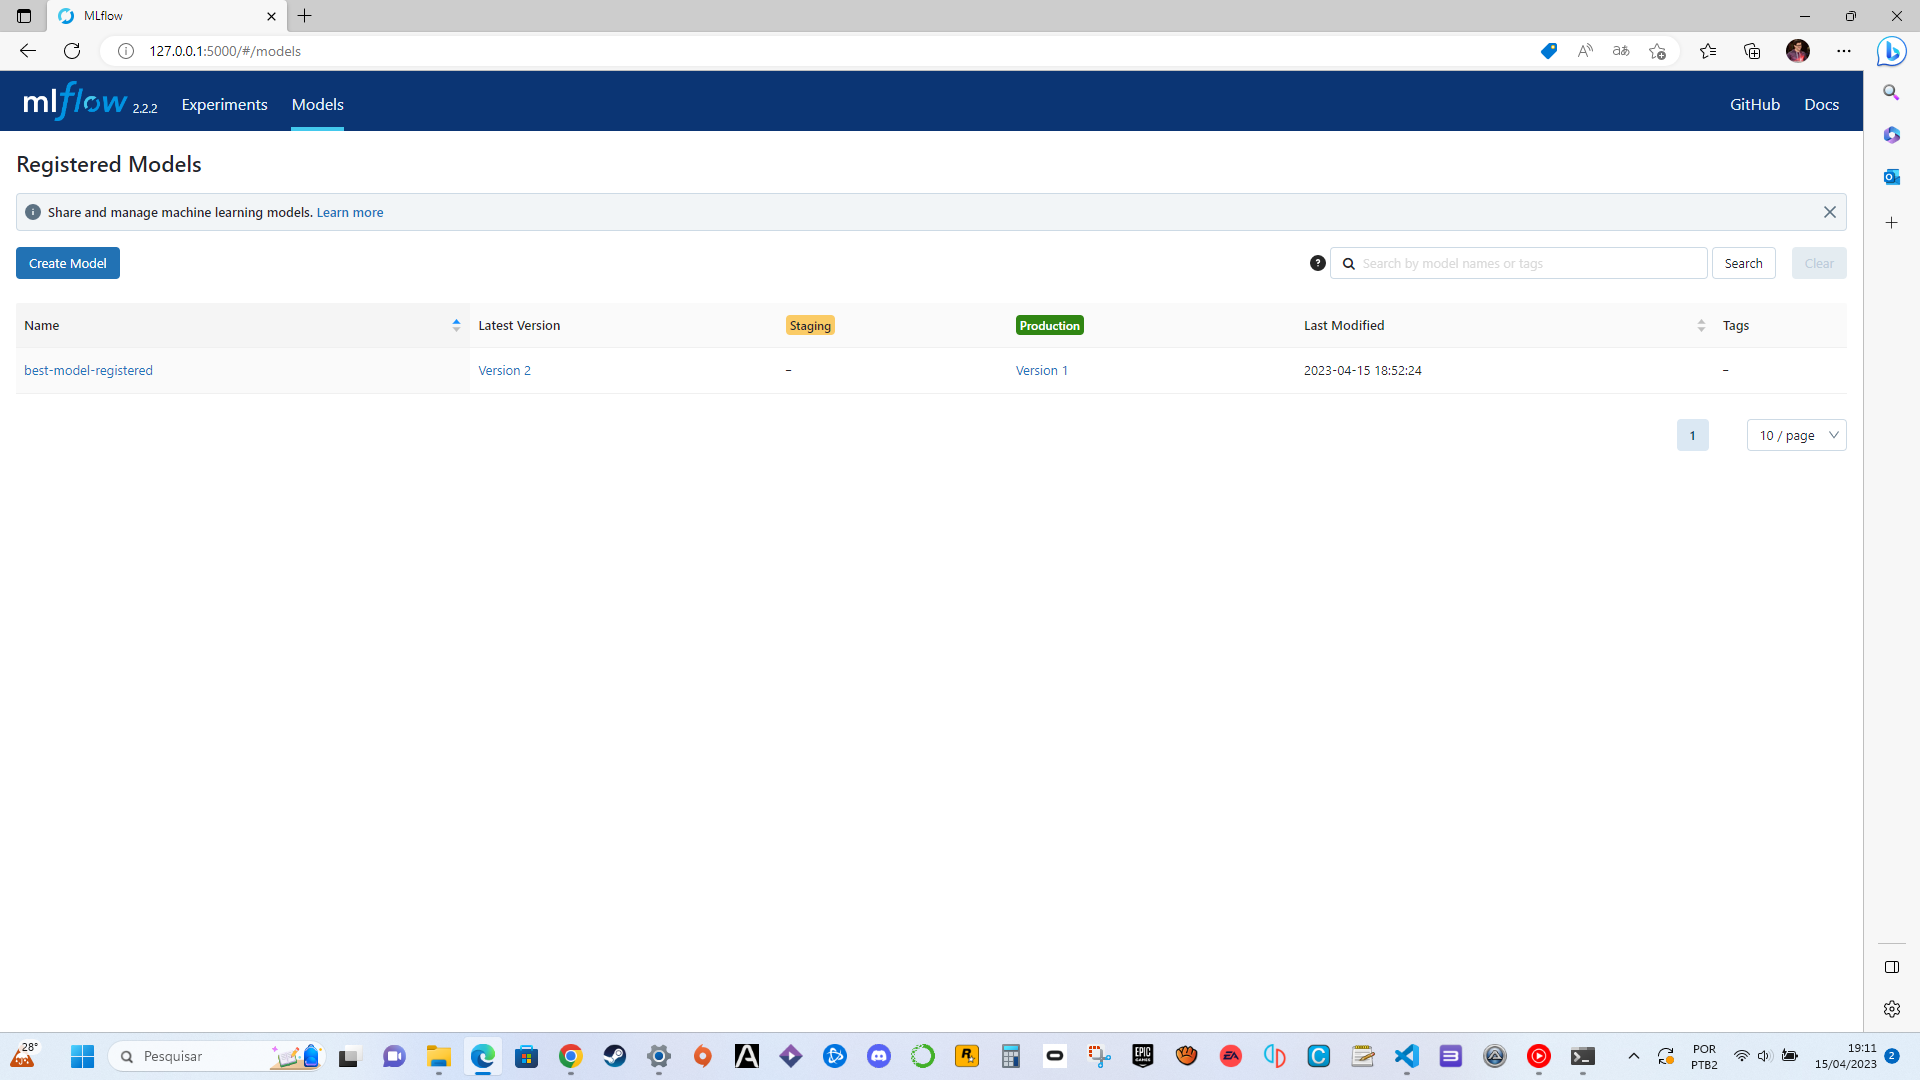

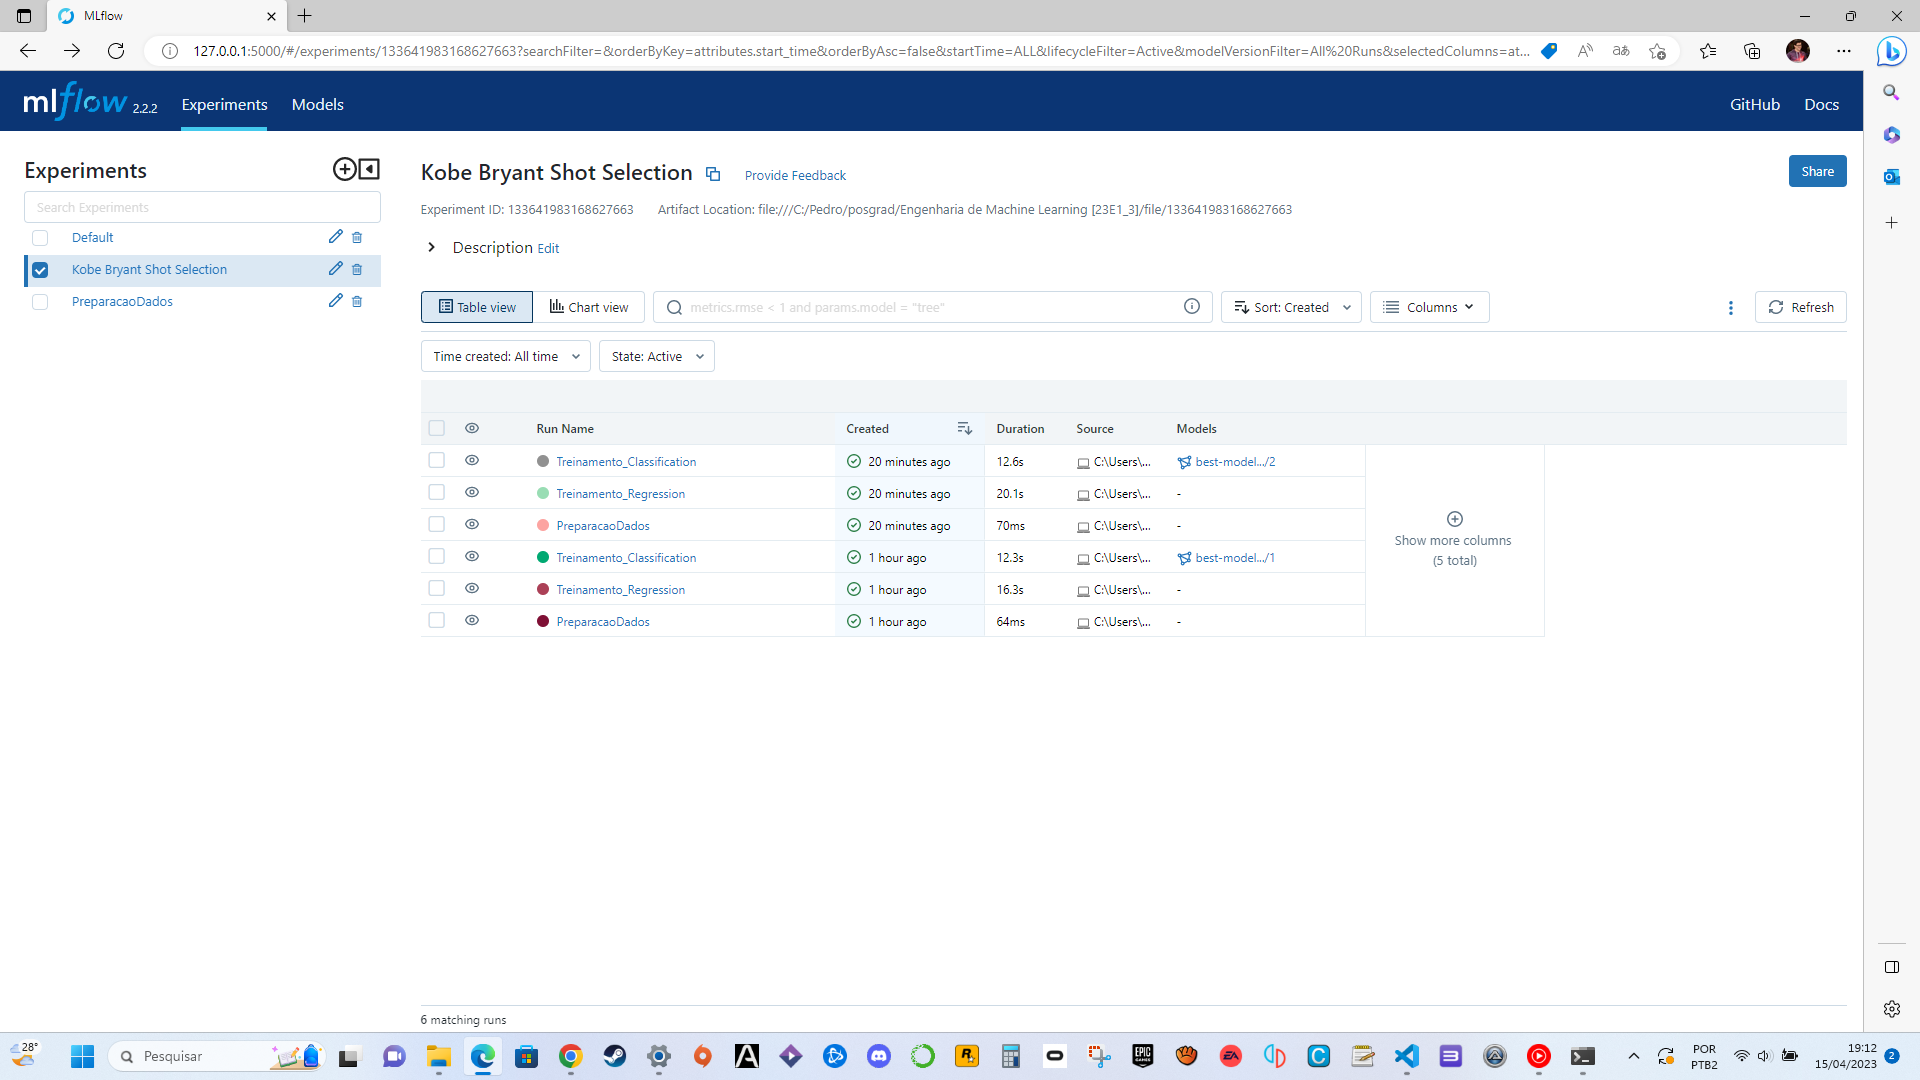

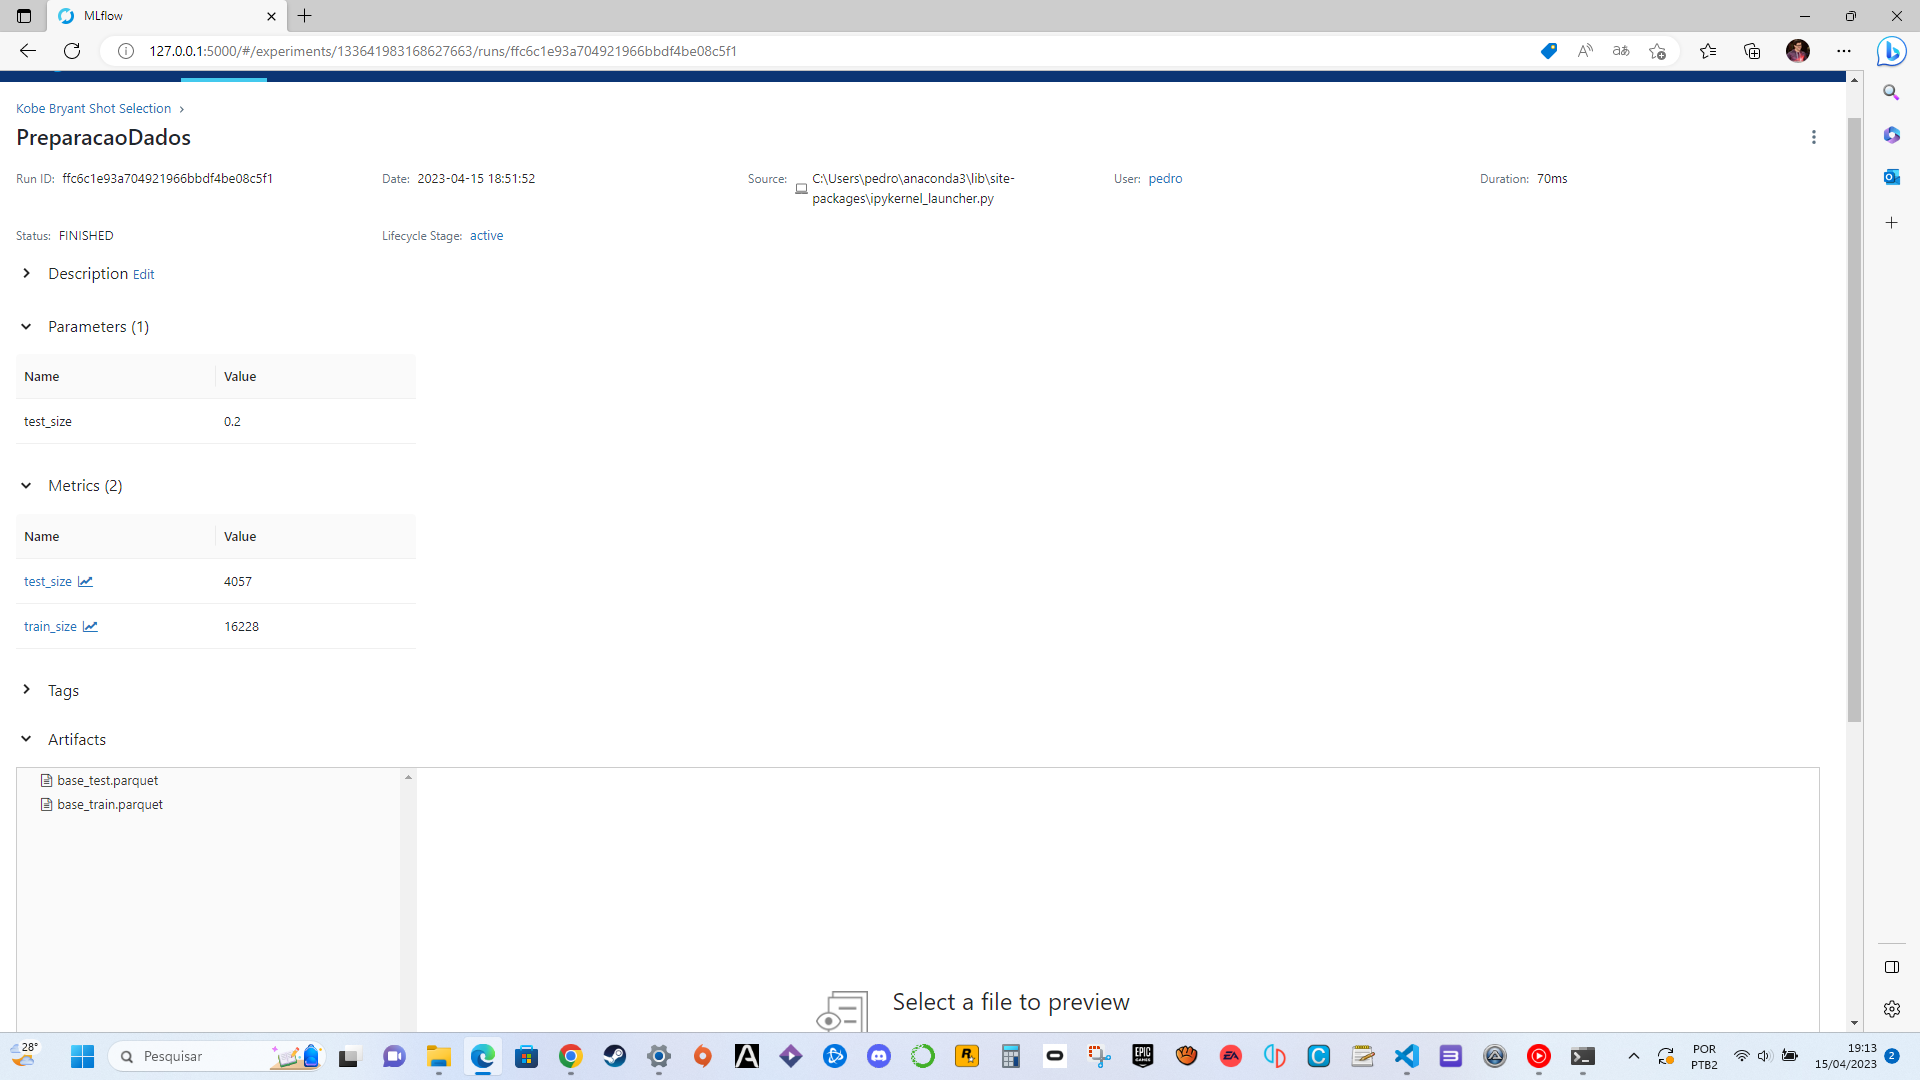

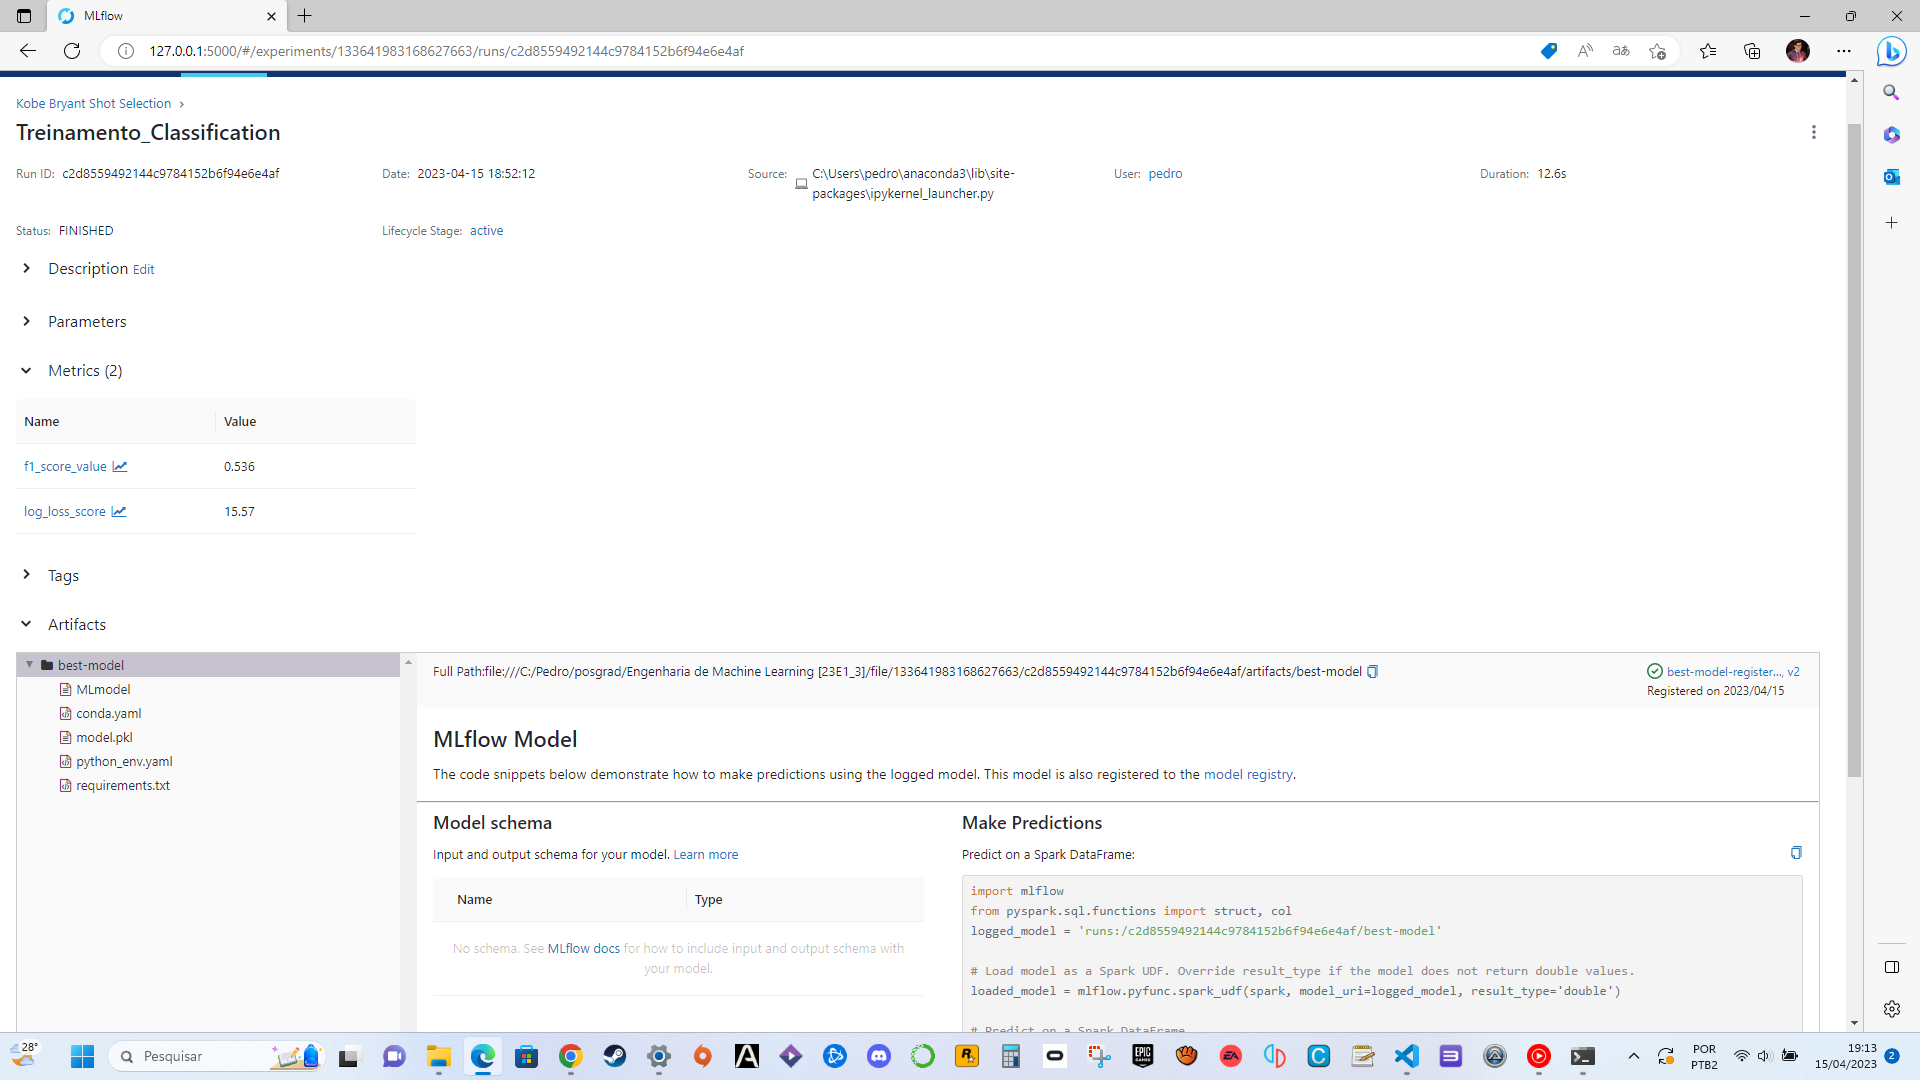

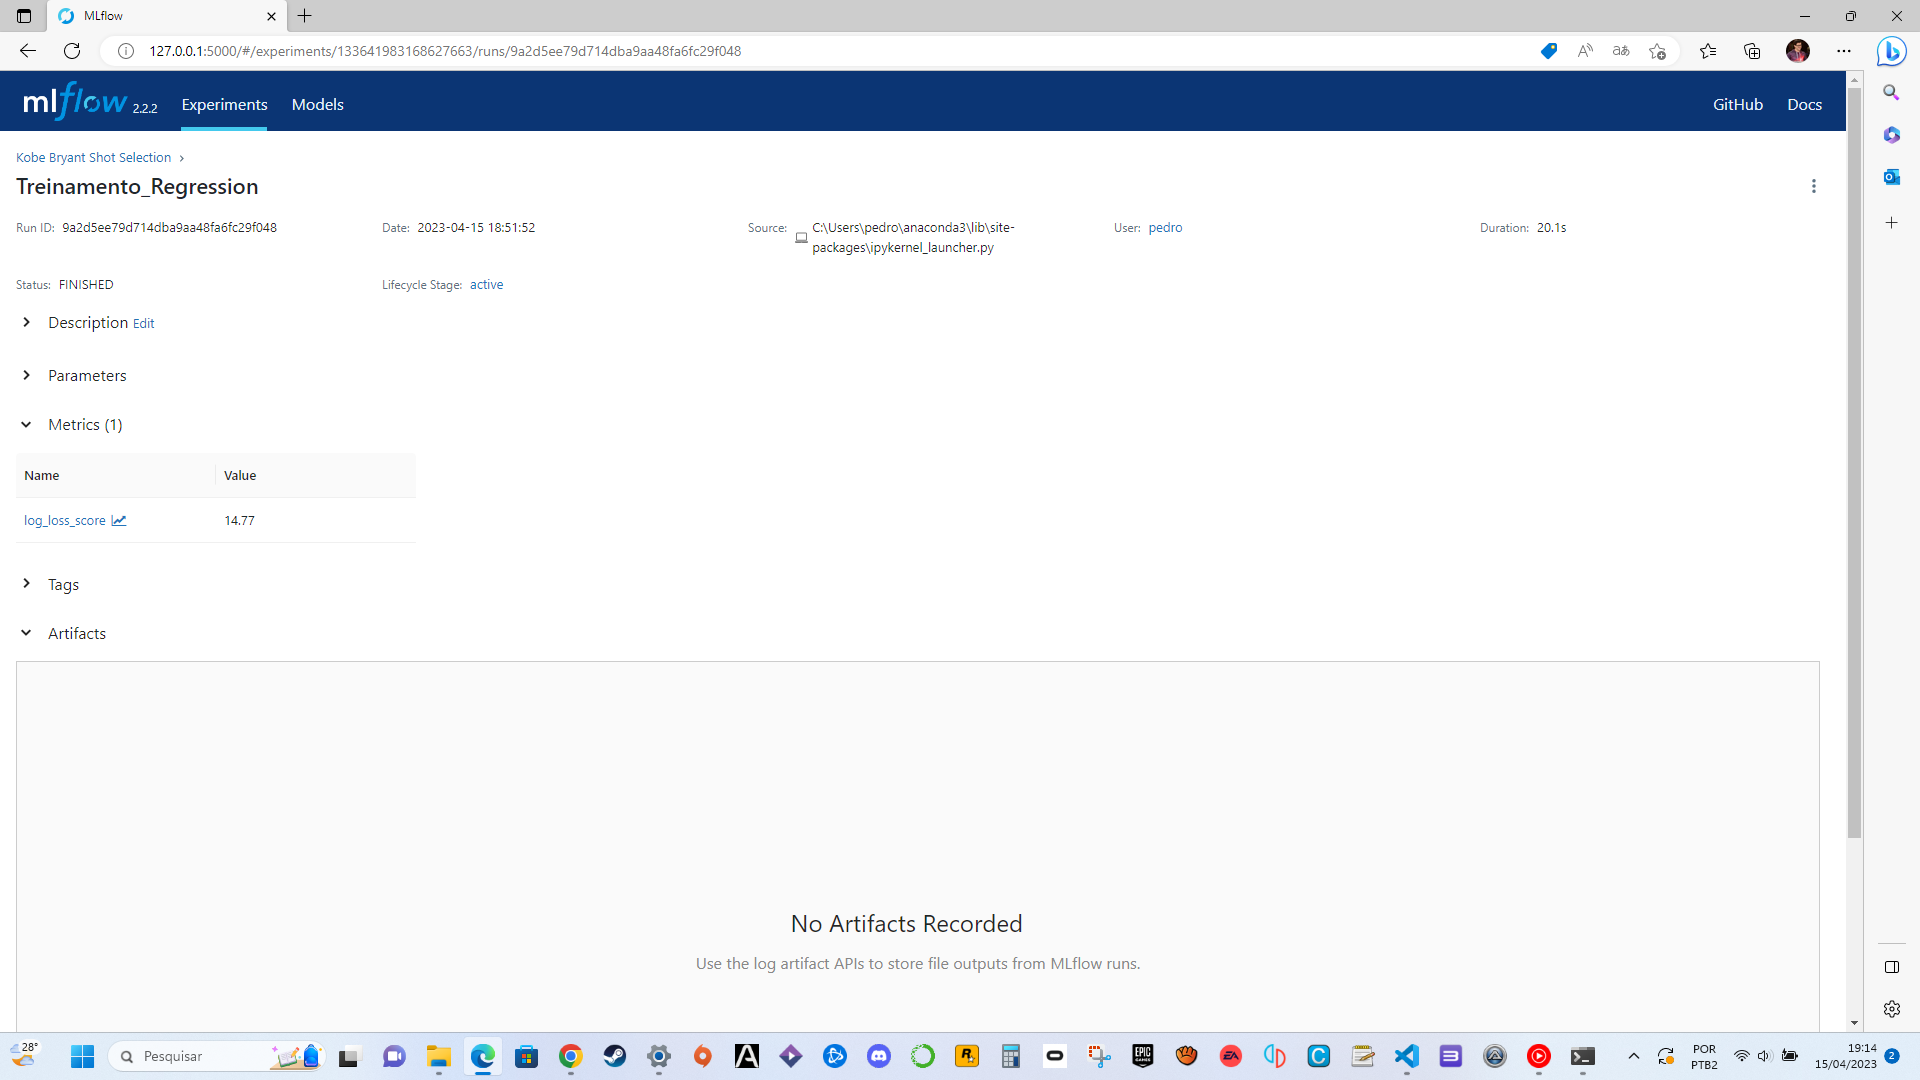

In [40]:
############################ 8)

data_path = "./Data/kobe_dataset.csv"
df = pd.read_csv(data_path)

df = df[df["shot_type"] == "3PT Field Goal"]
df = df[["lat", "lon", "minutes_remaining", "period", "playoffs", "shot_distance", "shot_made_flag"]]
df = df.dropna()
json_data = df.to_json(orient="split")


In [18]:
# Envie uma solicitação POST para o endpoint do modelo
response = requests.post(
    url="http://localhost:5000/invocations",
    data=json_data,
    headers={"Content-Type": "application/json; format=pandas-split"},
)

#print(response.json())

In [19]:
response.text ###### deu errado o requests, vamos usar os arquivos locais

'<!doctype html>\n<html lang=en>\n<title>404 Not Found</title>\n<h1>Not Found</h1>\n<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>\n'

In [42]:
import mlflow.pyfunc
import requests
import pandas as pd

# Carregue o modelo
model = mlflow.pyfunc.load_model("file:///C:/Pedro/posgrad/Engenharia de Machine Learning [23E1_3]/file/133641983168627663/cdbdfe5ac65f40f8ae02665b92448373/artifacts/best-model")

In [44]:
result = model.predict(df.drop('shot_made_flag', axis=1))

In [45]:
df['prediction'] = result

In [46]:
# eixo y
df.shot_made_flag.value_counts()

0.0    3630
1.0    1782
Name: shot_made_flag, dtype: int64

In [47]:
# predição
df['prediction'].value_counts()

0.0    5410
1.0       2
Name: prediction, dtype: int64

In [48]:
df.to_parquet("./Data/processed/teste_2pts.parquet")
mlflow.log_artifact("./Data/processed/teste_2pts.parquet")

log_loss_score = log_loss(y_true=df['shot_made_flag'], y_pred=df['prediction'])
f1_score_value = f1_score(y_true=df['shot_made_flag'], y_pred=df['prediction'])

print(f"New log loss: {log_loss_score}")
print(f"New F1 score: {f1_score_value}")

New log loss: 5.255213515378235
New F1 score: 0.0


8)a) O modelo não é aderente a essa nova base, afinal a predição está totalmente descolada da realidade. O motivo é que o modelo foi treinado com os dados de cestas de 2 pontos, para 3 pontos os parâmetros são diferentes.

8)b) A monitoração da saúde do modelo é uma tarefa importante para garantir que o modelo está funcionando corretamente e produzindo resultados precisos e confiáveis. No entanto, sem a disponibilidade da variável resposta para o modelo em operação, a monitoração pode ser mais difícil.

Uma abordagem comum para monitorar a saúde do modelo sem a disponibilidade da variável resposta é monitorar as variáveis preditoras. Isso pode ser feito usando técnicas de análise de dados para identificar padrões e tendências nas variáveis preditoras que possam indicar problemas com o modelo. Além disso, é possível usar técnicas de análise de dados para identificar anomalias nas saídas do modelo que possam indicar problemas.

Outra abordagem é usar técnicas de simulação para gerar dados sintéticos que possam ser usados para testar o modelo. Isso pode ser útil para avaliar como o modelo se comporta em diferentes cenários e identificar quaisquer problemas que possam surgir.

8)c) A estratégia reativa envolve a atualização do modelo em resposta a eventos específicos ou mudanças no ambiente. Por exemplo, se o modelo começar a produzir resultados imprecisos ou inconsistentes, pode ser necessário atualizá-lo para corrigir o problema. A estratégia reativa é útil quando as mudanças no ambiente são previsíveis e podem ser facilmente identificadas.

A estratégia preditiva envolve a atualização do modelo com base em previsões sobre mudanças futuras no ambiente. Por exemplo, se houver uma mudança planejada no ambiente que possa afetar o desempenho do modelo, pode ser necessário atualizá-lo antes que a mudança ocorra. A estratégia preditiva é útil quando as mudanças no ambiente são menos previsíveis ou difíceis de identificar.

In [ ]:
import streamlit as st
import pandas as pd
import mlflow.pyfunc

# Carregar o modelo
model = mlflow.pyfunc.load_model("file:///C:/Pedro/posgrad/Engenharia de Machine Learning [23E1_3]/file/133641983168627663/cdbdfe5ac65f40f8ae02665b92448373/artifacts/best-model")

# Crie o aplicativo Streamlit
st.title("Previsão de Arremessos do Kobe Bryant")
st.write("Insira os seguintes detalhes para prever se Kobe acertou ou errou a cesta.")

# Crie campos de entrada para o usuário
lat = st.number_input("Latitude")
lon = st.number_input("Longitude")
minutes_remaining = st.number_input("Minutos Restantes")
period = st.number_input("Período")
playoffs = st.selectbox("Playoffs?", ["Sim", "Não"])
shot_distance = st.number_input("Distância do Arremesso")

# Converta a entrada do usuário em um DataFrame
user_input = pd.DataFrame({
    'lat': [lat],
    'lon': [lon],
    'minutes_remaining': [minutes_remaining],
    'period': [period],
    'playoffs': [playoffs == "Sim"],
    'shot_distance': [shot_distance]
})

# Use o modelo para fazer uma previsão
prediction = model.predict(user_input)

# Exiba a previsão para o usuário
if prediction[0] == 1:
    st.write("Kobe acertou a cesta!")
else:
    st.write("Kobe errou a cesta.")

### exemplo de erro da cesta
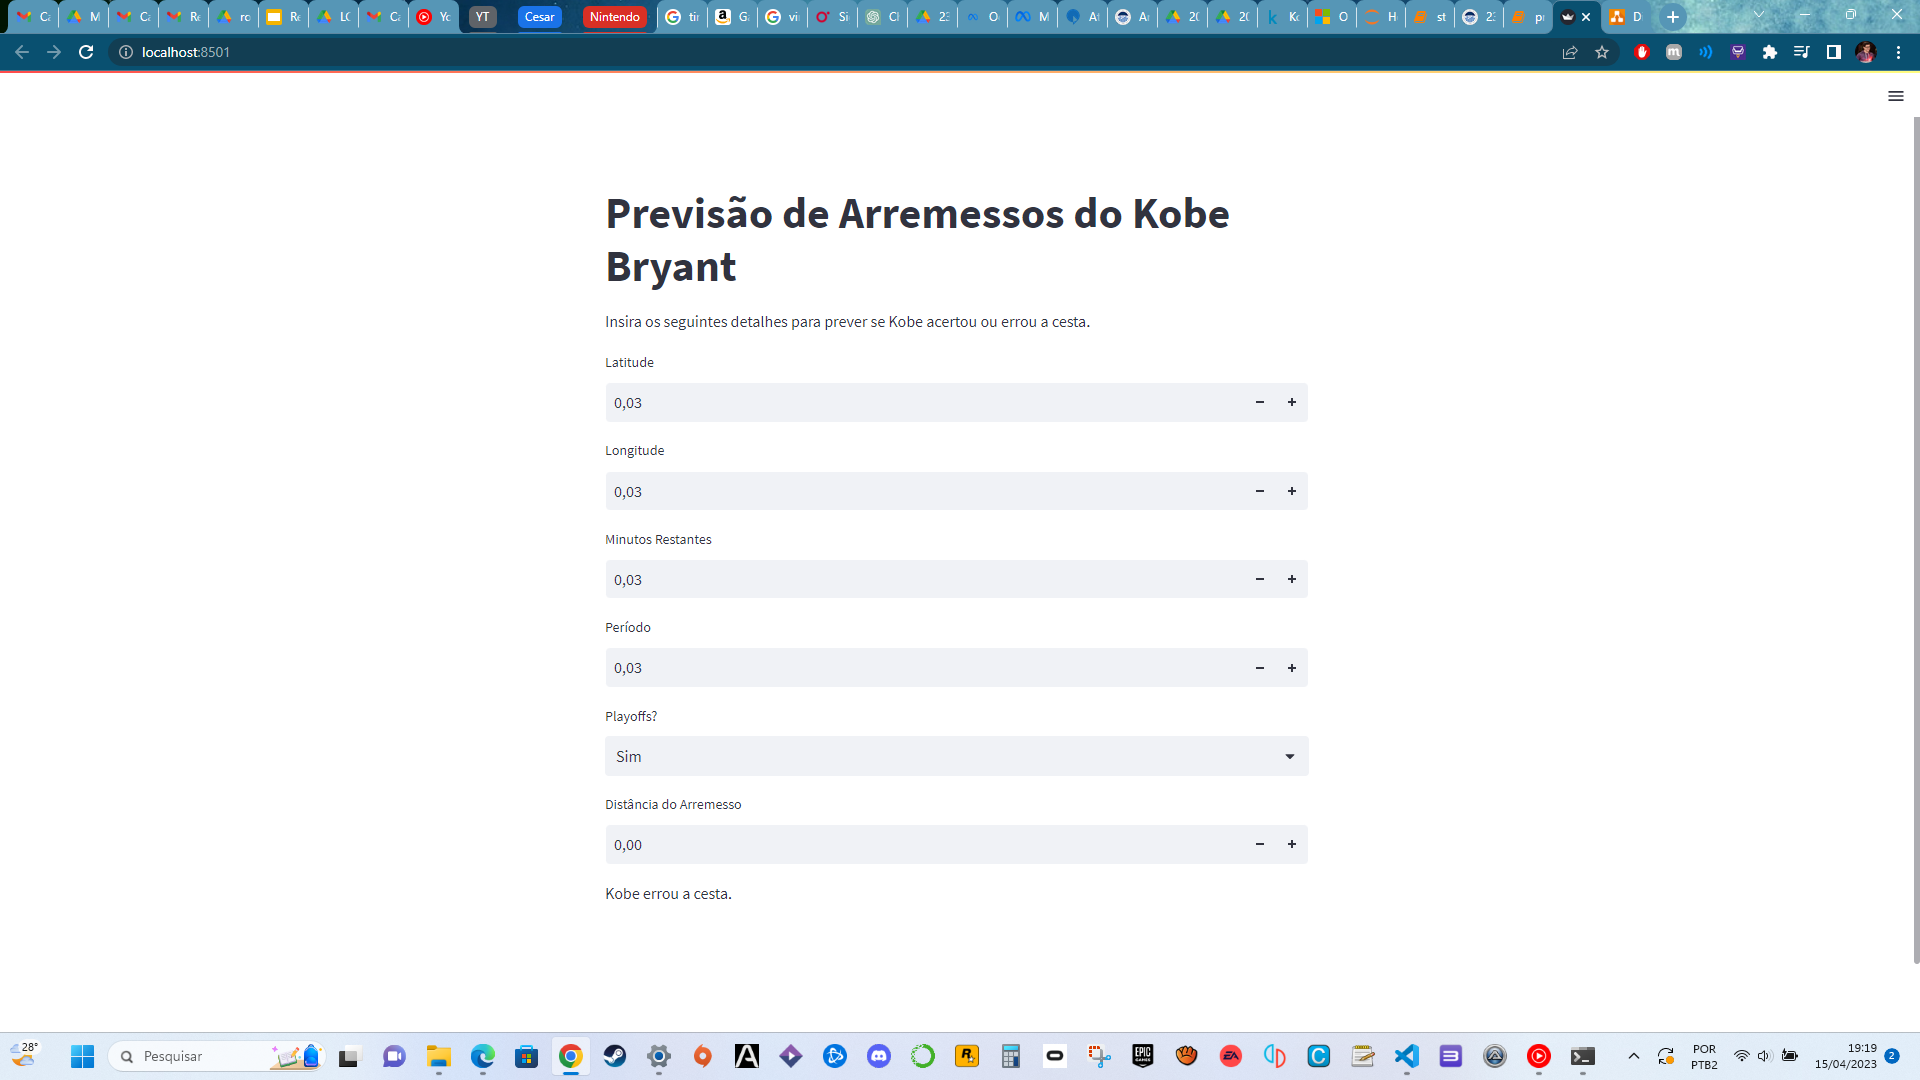

### exemplo de acerto da cesta
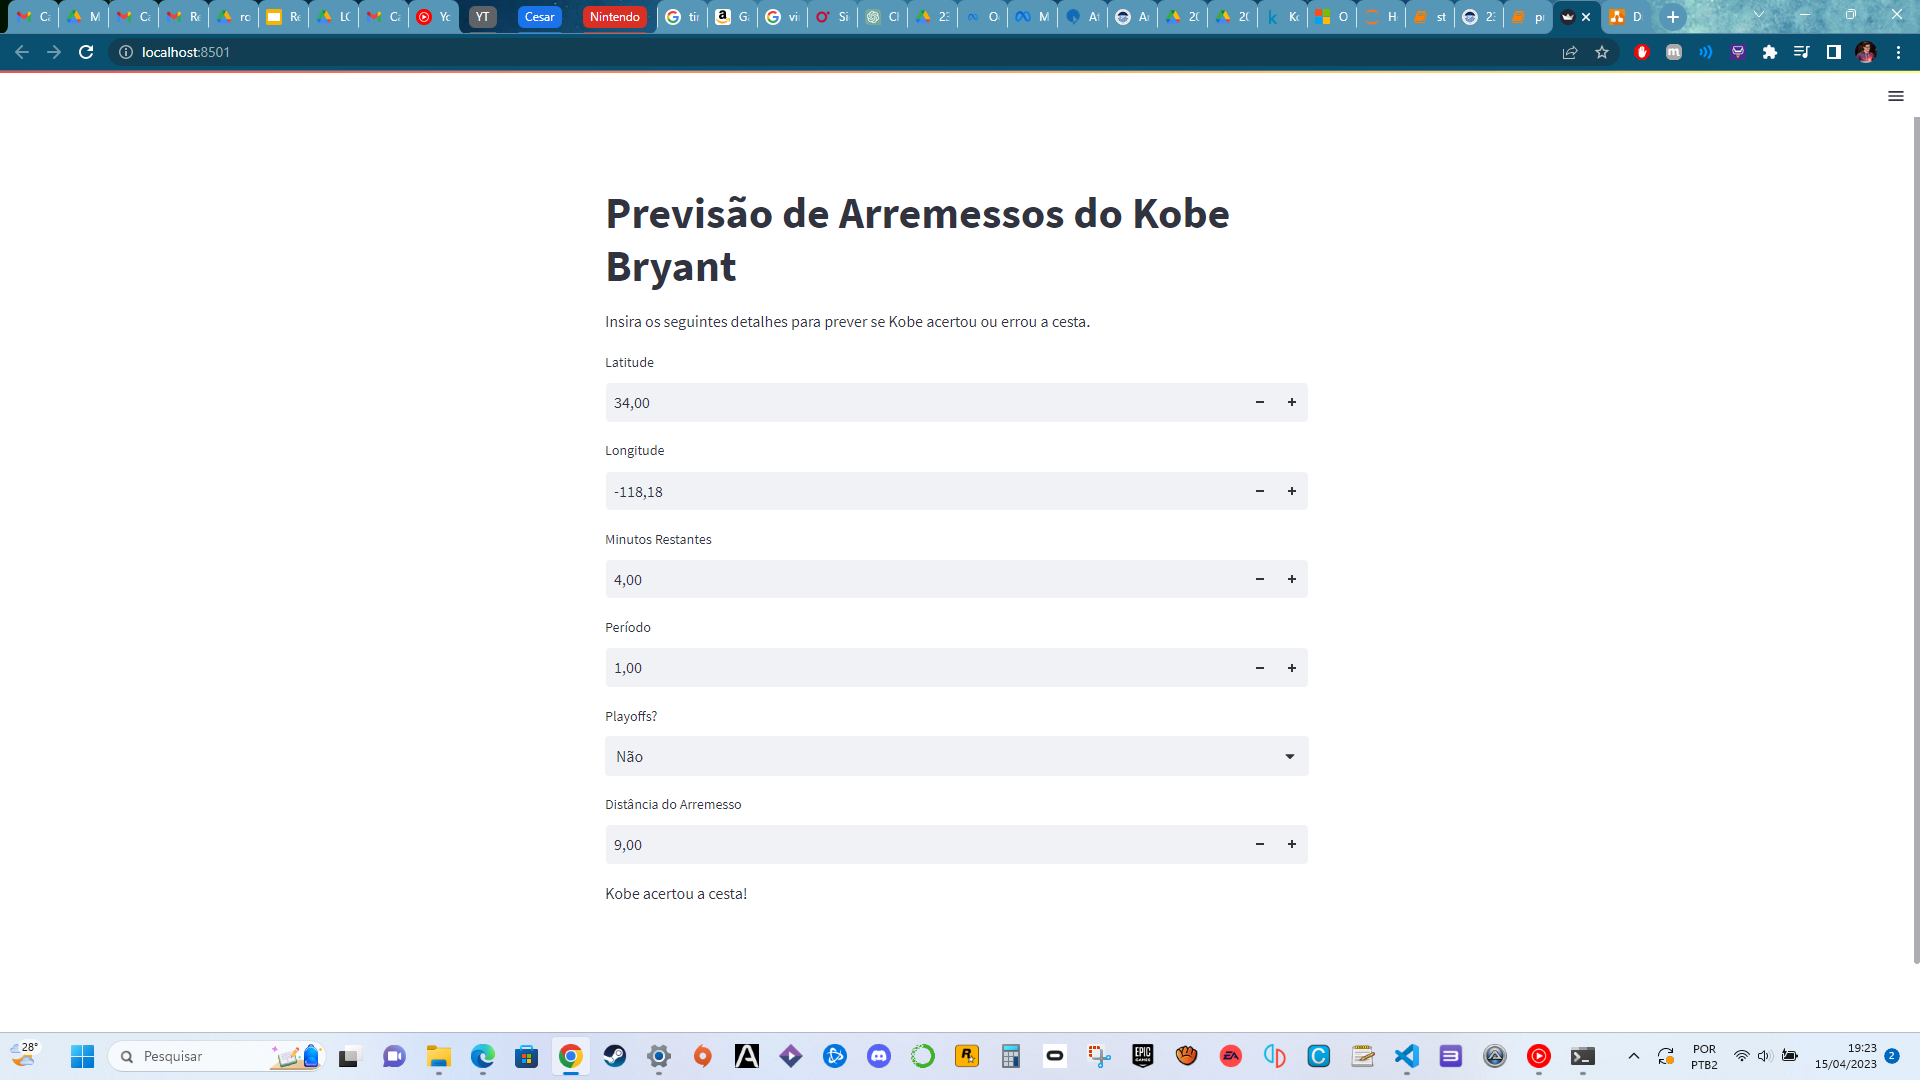